In [12]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

warnings.filterwarnings('ignore')

def scoring(y_pred,y_test):
    print('accuracy  : {}'.format(accuracy_score(y_pred, y_test)))
    print('recall    : {}'.format(recall_score(y_pred, y_test)))
    print('precision : {}'.format(precision_score(y_pred, y_test)))

## Récupération des données 

(4375,)
(4375, 13)


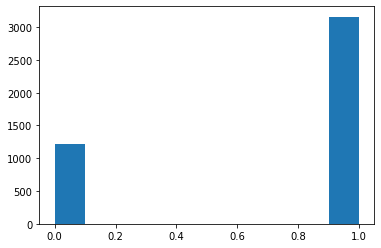

In [13]:
datapd = pd.read_csv('./data/credit_scoring.csv', sep=';')

data = np.array(datapd)

y = data[:, -1] # for last column
X = data[:, :-1] # for all but last column

print(y.shape)
print(X.shape)

plt.hist(y)
plt.show()

## Application des modèles 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [16]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

scoring(y_pred,y_test)

accuracy  : 0.7271480804387569
recall    : 0.8223383409536251
precision : 0.7948232323232324


In [17]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

scoring(y_pred,y_test)

accuracy  : 0.7248628884826326
recall    : 0.7709713024282561
precision : 0.8819444444444444


In [18]:
clf = MLPClassifier(hidden_layer_sizes = (40,20), random_state=1, max_iter=300).fit(X_train, y_train)

y_pred = clf.predict(X_test)

scoring(y_pred,y_test)

accuracy  : 0.75
recall    : 0.7882156753752084
precision : 0.8952020202020202


### Choix du modèle :

Dans le cas de l'attribution de crédits, il est très important de ne pas donner de crédit à des gens non fiables (limiter les faux positifs). C'est donc la précision qui nous intéresse le plus, et non le rappel. 

En prenant en compte ce critère d'évaluation, le réseau de neurone nous donne une 'accuracy' meilleure, en plus de favoriser la precision au rappel. C'est donc ce modèle qui est favorable à notre problème, et donne les meilleurs résultats.

## Entrainement avec normalisation des données :

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data = pd.read_csv('./data/credit_scoring.csv', sep=';')
data = np.array(data)

y = data[:, -1] # for last column
X = data[:, :-1] # for all but last column

scaler.fit(X)
X_norm = scaler.transform(X)


def application_modeles(X_norm,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

    # Decision tree : 
    print('--------Decision tree--------')
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(scoring(y_pred,y_test))

    # Knn :
    print('--------Knn--------')
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    print(scoring(y_pred,y_test))

    # RN : 
    print('--------RN--------')
    clf = MLPClassifier(hidden_layer_sizes = (40,20), random_state=1, max_iter=300).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(scoring(y_pred,y_test))

application_modeles(X,y)

--------Decision tree--------
accuracy  : 0.7271480804387569
recall    : 0.8223383409536251
precision : 0.7948232323232324
None
--------Knn--------
accuracy  : 0.7248628884826326
recall    : 0.7709713024282561
precision : 0.8819444444444444
None
--------RN--------
accuracy  : 0.75
recall    : 0.7882156753752084
precision : 0.8952020202020202
None


### Conclusion

On observe que les résultats ne changent pas pour l'arbre de décision, puisqu'il n'est pas sensible aux échelles de donénes, mais sont sensiblement améliorés sur les deux autres modèles (meilleur score d'accuracy). 

Le modèle le plus performant pour le moment est le réseau neuronal avec normalisation de données.

## Entrainement avec réduction de dimension : ACP

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()

scaler.fit(X)
X_norm = scaler.transform(X)

pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

X_pca = np.concatenate((X,X_pca), axis = 1)

## Application des algorithmes
application_modeles(X_pca,y)

--------Decision tree--------
accuracy  : 0.7271480804387569
recall    : 0.8223383409536251
precision : 0.7948232323232324
None
--------Knn--------
accuracy  : 0.7248628884826326
recall    : 0.7709713024282561
precision : 0.8819444444444444
None
--------RN--------
accuracy  : 0.75
recall    : 0.7882156753752084
precision : 0.8952020202020202
None


### Conclusion

L'ACP permet d'améliorer très faiblement les résultats du KNN, mais ne change quasiment pas la performance globale des différents modèles. Les données ajoutées par l'ACP sont redondantes avec les données précédentes, et ne permettent pas d'améliorer l'entrainement des algorithmes.

La précision du meilleur modèle est alors de 76%, et ne suffit pas à améliorer les résultats précédemment obtenus avec le RN + normalisation. 

On choisit donc de conserver le modèle précédent, réseau neuronale appliqué aux données normalisées.

## Selection de variables 

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


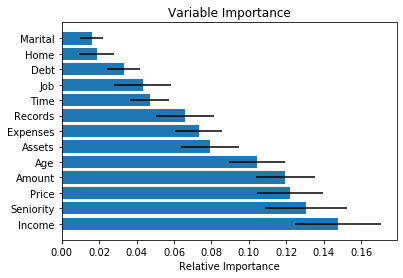

In [21]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.5, random_state=1)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features =datapd.columns
print(features[sorted_idx])
padding = np.arange(X_train.size/len(X_train)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

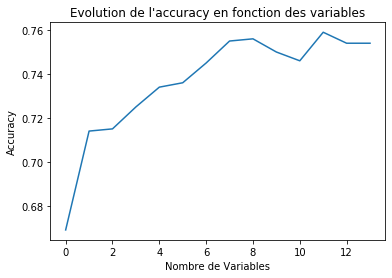

In [22]:
KNN=KNeighborsClassifier(n_neighbors=5)
scores=np.zeros(X_train.shape[1]+1)
for f in np.arange(0, X_train.shape[1]+1):
 X1_f = X_train[:,sorted_idx[:f+1]]
 X2_f = X_test[:,sorted_idx[:f+1]]
 KNN.fit(X1_f,y_train)
 YKNN=KNN.predict(X2_f)
 scores[f]=np.round(accuracy_score(y_test,YKNN),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

## Paramétrage des classifieurs 

In [23]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.5, random_state=1)

# Decision tree : 
print('--------Decision tree--------')
clf = DecisionTreeClassifier(random_state=0)

criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = list(range(1, 31))
param_grid = dict(criterion = criterion, splitter = splitter,max_depth = max_depth)

clf = GridSearchCV(clf,param_grid,scoring= 'accuracy',return_train_score=True,n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
print(scoring(y_pred,y_test))


# Knn :
print('--------Knn--------')
neigh = KNeighborsClassifier()

weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
n_neighbors = list(range(1, 11))
param_grid = dict(n_neighbors=n_neighbors, weights = weights, algorithm = algorithm)

neigh = GridSearchCV(neigh,param_grid,scoring= 'accuracy',return_train_score=True,n_jobs=-1)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(neigh.best_params_)
print(scoring(y_pred,y_test))

# RN : 
print('--------RN--------')
clf = MLPClassifier(hidden_layer_sizes = (40,20), random_state=1, max_iter=300).fit(X_train, y_train)

max_iter = [300, 400]
hidden_layer_sizes = [(40,20), (45,25),(20,10)]
param_grid = dict(max_iter=max_iter,hidden_layer_sizes=hidden_layer_sizes)

clf = GridSearchCV(clf,param_grid,scoring= 'accuracy',return_train_score=True,n_jobs=-1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
print(scoring(y_pred,y_test))


--------Decision tree--------
{'criterion': 'gini', 'max_depth': 7, 'splitter': 'random'}
accuracy  : 0.7536563071297989
recall    : 0.7970437748720864
precision : 0.88510101010101
None
--------Knn--------
{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}
accuracy  : 0.7774223034734917
recall    : 0.8168688619295205
precision : 0.8926767676767676
None
--------RN--------
{'hidden_layer_sizes': (20, 10), 'max_iter': 300}
accuracy  : 0.7714808043875686
recall    : 0.8353960396039604
precision : 0.8522727272727273
None


### Conclusion

Les résultats ci-dessus correspondent aux paramètres optimaux trouvés par l'algorithme dans l'ensemble de paramètres donné, ainsi que les scores obtenus pour ces paramètres.

On obtient des résultats très légèrement meilleurs que les précédents (2% de précision pour le Knn et le RN), qu'on pourrait sans doute encore augmenter en élargissant la recherche des paramètres.

Cependant, le temps de recherche est assez important, ce qui laisse penser qu'il serait avisé de prédire les paramètres optimaux avant la recherche pour la cibler et éviter des entrainement d'algorithmes inutiles.

In [25]:
from sklearn.pipeline import Pipeline

# Pipeline généralisée :
def pipelinemodel(classifier,X_train,y_train,X_test,y_test):
    pipe = Pipeline(steps = [('scaler', StandardScaler()),('pca', pca), ('classifier', classifier)])
    pipe.fit(X_train, y_train)
    print(pipe.score(X_test, y_test))

In [26]:
# Application de la pipeline à un MLP :

clf = MLPClassifier(hidden_layer_sizes = (40,20), random_state=1, max_iter=300)

pipelinemodel(clf,X_train,y_train,X_test,y_test)

0.7253199268738574


In [27]:
import pickle

# Creation d'un Pickle : 
clf = MLPClassifier(hidden_layer_sizes = (40,20), random_state=1, max_iter=300)
pipe = Pipeline(steps = [('scaler', StandardScaler()),('pca', pca), ('classifier', clf)])
s = pickle.dumps(pipe)

#...